<a href="https://www.kaggle.com/code/absndus/data-science-portfolio-understanding-gdp?scriptVersionId=135187800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Science Portfolio - Understanding GDP and Life Expectancy Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/28/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This project goes over the process of analyzing data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries provided in the CSV file.

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Vision and Goals](#2.-Vision-and-Goals)
3. [Load GDP Countries Dataset into Notebook and Review the Dataset](#3.-Load-GDP-Countries-Dataset-into-Notebook-and-Review-the-Dataset)
4. [Perform Exploration Data Analysis](#4.-Perform-Exploration-Data-Analysis)
5. [Summary](#5.-Summary)

## 1. Introduction ##

This section imports the necessary library modules to analyze the GDP and the life expenctancy of the six countries presented in the WHO csv file. 

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [1]:
import numpy as np # linear algebra
import seaborn as sns # Seoborn graphs and ease of manageability. 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # Matplotlib for advance graphing and plotting. 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gdp-dataset-for-learning-visualization/gdp_data.csv


## 2. Vision and Goals ##

This project vision is to understand the relationship between the Gross Domestic Product (GDP) from the six countries and how they relate to the life expectancy for those countries. 

**Vision:** To provide visual graphs about the relationships between GDP and the Life expectancies between various countries. 

**Goals:**
1. Complete a project and add to my portfolio. 
2. Use Seaborn and Matplotlib to create visualizations of relationships between various countries of GDP and life expectancy. 
3. Become familiar with presenting and sharing data visualizations. 
4. Preprocess, explore, and analyze data

## 3. Load GDP Countries Dataset into Notebook and Review the Dataset ##

In this section, the dataset will be loaded in this notebook for any staging, cleaning, transformation and labeling for EDA to present the relationships between the countries' GDP and life expectancies. 

1. Load the dataset and name the new dataframe as **who_gdp_le_df**.

In [2]:
who_gdp_le_df = pd.read_csv('/kaggle/input/gdp-dataset-for-learning-visualization/gdp_data.csv')
who_gdp_le_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


2. View the data types for the columns. 

In [3]:
who_gdp_le_df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

3. View the summary of the dataset. 

In [4]:
who_gdp_le_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


**Dataset summary:** Based on the **.info()** summary, there were no missing data in the dataset **who_gdp_le_df**.

4. View the distinct countries from the **Country** column of the **who_gdp_le_df**.

In [5]:
distinct_countries = who_gdp_le_df['Country'].unique()
distinct_countries
print(f"There are {len(distinct_countries)} countries in the dataset. Also, here is the list of the countries: \n {distinct_countries}")

There are 6 countries in the dataset. Also, here is the list of the countries: 
 ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


5. Get six subsets of each country into separate dataframe for ease of analysis. 

In [6]:
#Sub-sample the data from the who_gdp_le_df for Chile into a new df called chile_df. 
chile_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Chile']

#Sub-sample the data from the who_gdp_le_df for China into a new df called china_df. 
china_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'China']

#Sub-sample the data from the who_gdp_le_df for Germany into a new df called germany_df. 
germany_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Germany']

#Sub-sample the data from the who_gdp_le_df for Mexico into a new df called mexico_df. 
mexico_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Mexico']

#Sub-sample the data from the who_gdp_le_df for United States of America into a new df called usa_df. 
usa_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'United States of America']

#Sub-sample the data from the who_gdp_le_df for Zimbabwe into a new df called zimbabwe_df. 
zimbabwe_df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Zimbabwe']

#Print out the dataframes results. 
print(chile_df)
print(china_df)
print(germany_df)
print(mexico_df)
print(usa_df)
print(zimbabwe_df)

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

## 4. Perform Exploration Data Analysis ##

This section goes through the exploration of various aspects of the countries' relationships of GDP to life expectancies and visualize those relationships to appropriate visuals. 

**Key Exploratory Questions:**
1. Has life expectancy increased over time in the six nations?
2. Has GDP increased over time in the six nations?
3. Is there a correlation between GDP and life expectancy of a country?
4. What is the average life expectancy in these nations?
5. What is the distribution of that life expectancy?

I will go through each question and answer those questions with visuals to allow you to understand the relationships between GDP and life expectancies between the countries. 

1. What is the life expectancy like over the period of time in the six nations (plot them using a scatter plot method for each country into subplots)? 

In [7]:
#Get the subset of the data from the Chile Dataframe to review the dataset columns and values. 
chile_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


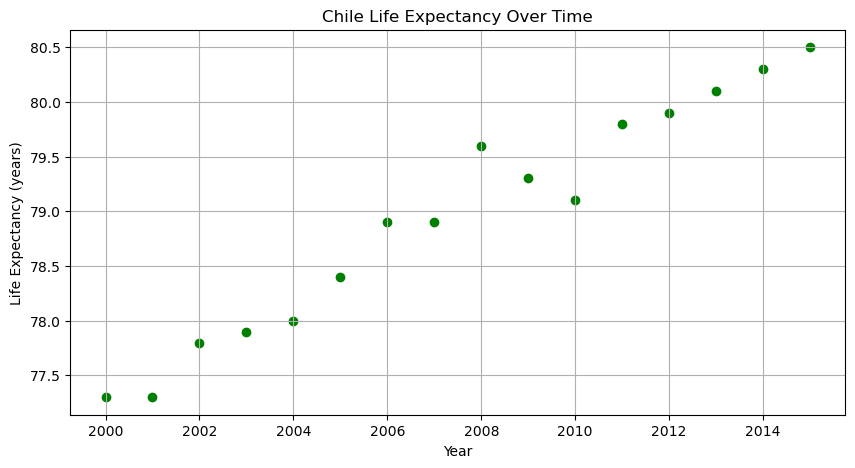

<Figure size 640x480 with 0 Axes>

In [8]:
#Create a scatter plot for Chile's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], chile_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Chile Life Expectancy Over Time')
plt.grid(True)
plt.show()
plt.clf()

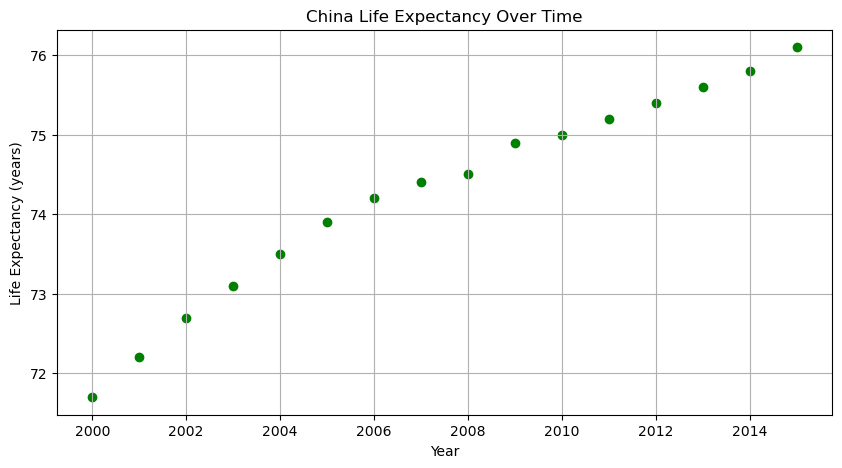

<Figure size 1000x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
#Create a scatter plot for China's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], china_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('China Life Expectancy Over Time')
plt.grid(True)
plt.figure(figsize=(10, 5))
plt.show()
plt.clf()

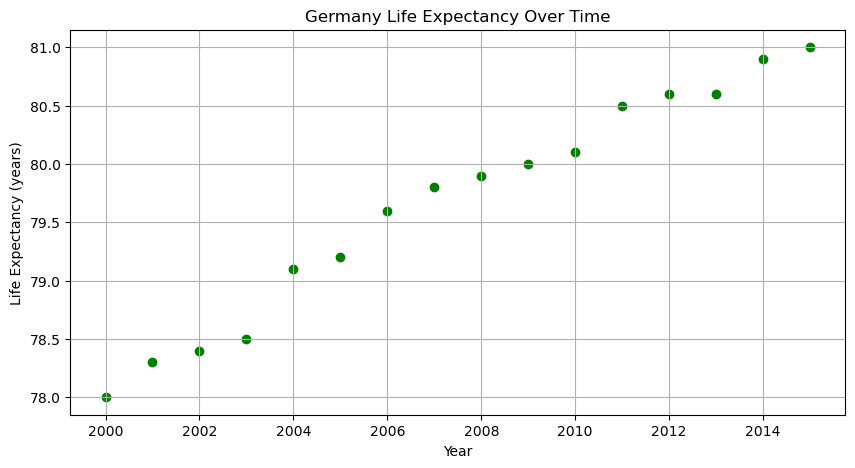

<Figure size 640x480 with 0 Axes>

In [10]:
#Create a scatter plot for Germany's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], germany_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Germany Life Expectancy Over Time')
plt.grid(True)
plt.show()
plt.clf()

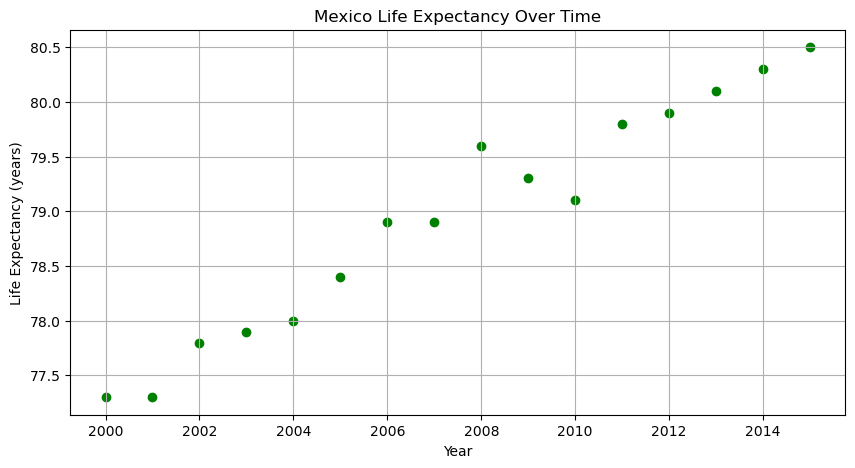

<Figure size 640x480 with 0 Axes>

In [11]:
#Create a scatter plot for Mexico's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], chile_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Mexico Life Expectancy Over Time')
plt.grid(True)

plt.show()
plt.clf()

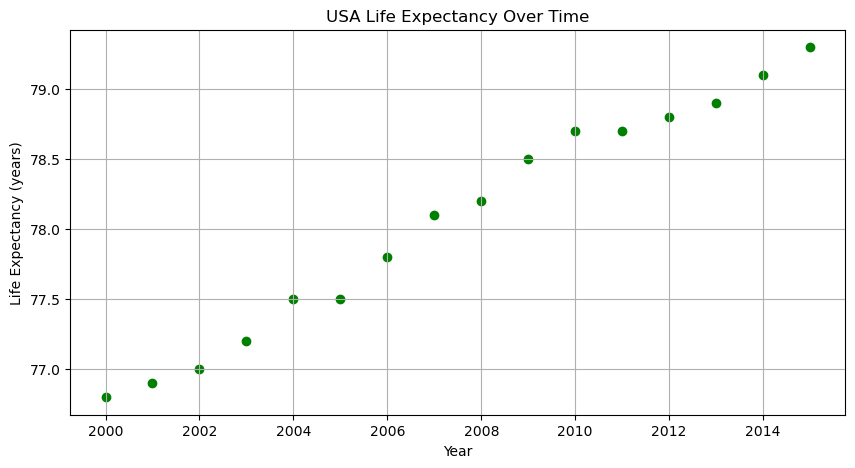

<Figure size 640x480 with 0 Axes>

In [12]:
#Create a scatter plot for USA's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], usa_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('USA Life Expectancy Over Time')
plt.grid(True)
plt.show()
plt.clf()

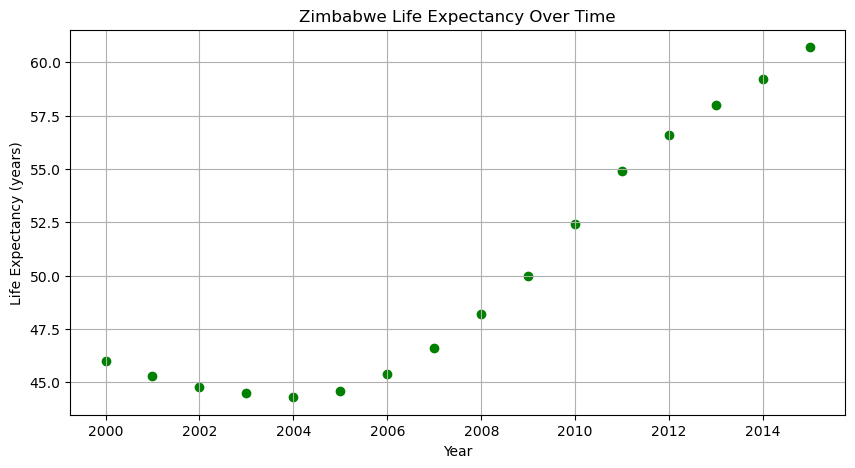

<Figure size 640x480 with 0 Axes>

In [13]:
#Create a scatter plot for Zimbabwe's year to life expectancy over time. 
plt.figure(figsize=(10, 5))
plt.scatter(chile_df['Year'], zimbabwe_df['Life expectancy at birth (years)'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Zimbabwe Life Expectancy Over Time')
plt.grid(True)
plt.show()
plt.clf()

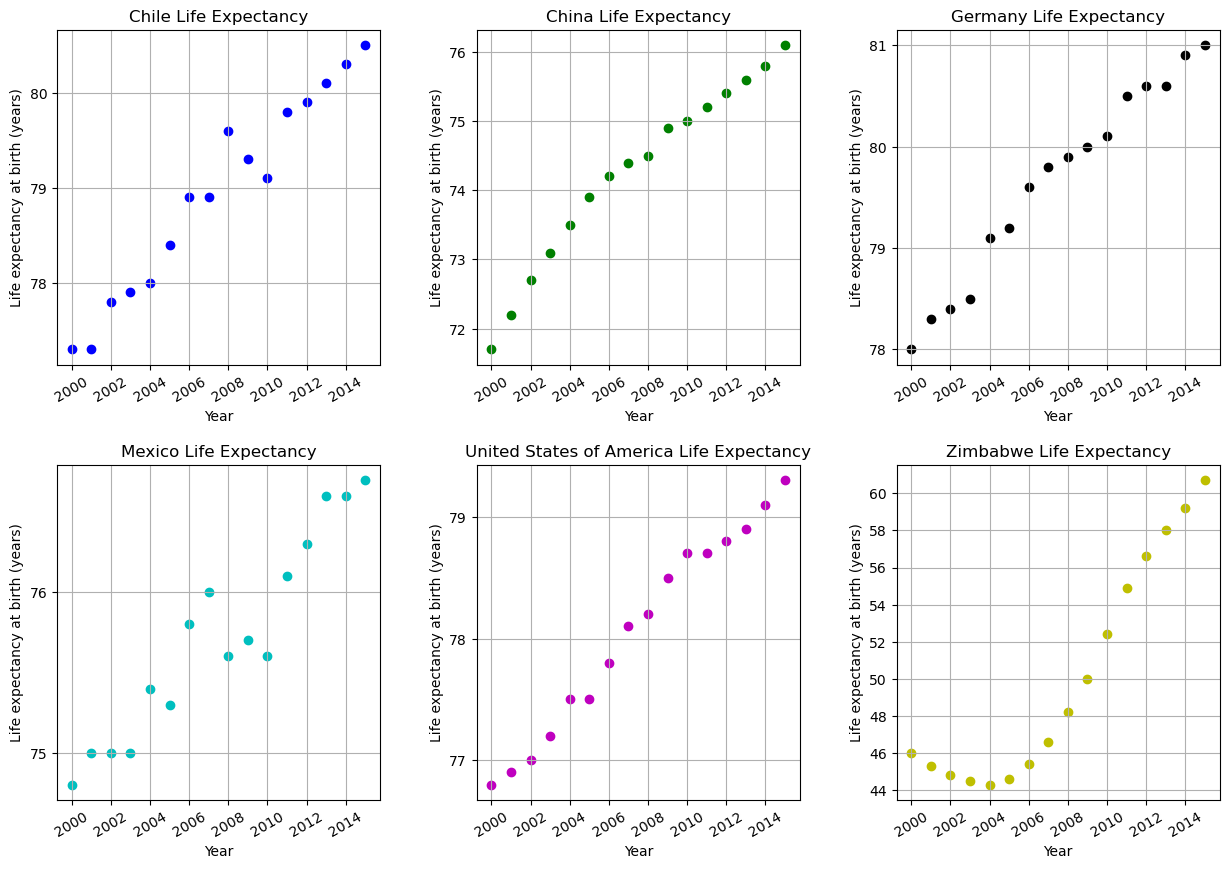

<Figure size 640x480 with 0 Axes>

In [14]:
# Create a side-by-side subplots comparing all of the six countries of life expectancies against each other over the years.
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) #Create a subplots size of 2 rows to 3 columns subplots format. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 
axs = axs.ravel()
colors = ['b', 'g', 'black', 'c', 'm', 'y'] #Create a pallete of various colors for six of the countries.

for i, country in enumerate(countries):
    df = who_gdp_le_df[who_gdp_le_df['Country'] == country]
    axs[i].scatter(df['Year'], df['Life expectancy at birth (years)'], color=colors[i])
    axs[i].set_xlabel('Year')
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #Ensure that the numerics are set to discrete whole numbers for the year. 
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[i].set_ylabel('Life expectancy at birth (years)')
    axs[i].grid(True)
    axs[i].set_title(country + ' Life Expectancy')
    axs[i].tick_params(axis='x', labelrotation=30)
    
    plt.subplots_adjust(wspace=0.30) #Adjust the vertically spacing between subplots
    plt.subplots_adjust(hspace=0.30) #Adjust the horizontal spacing between subplots

plt.show()
plt.clf()

**Visual Summary:** This above subplots shows the life expectancy over a period of time. Basedon the total six subplots from six countries, I can see that the life expectancy increased throughout the year using the prior years dataset. 

2. Has the Gross Domestic Products (GDP) increased over the years in the six countries?

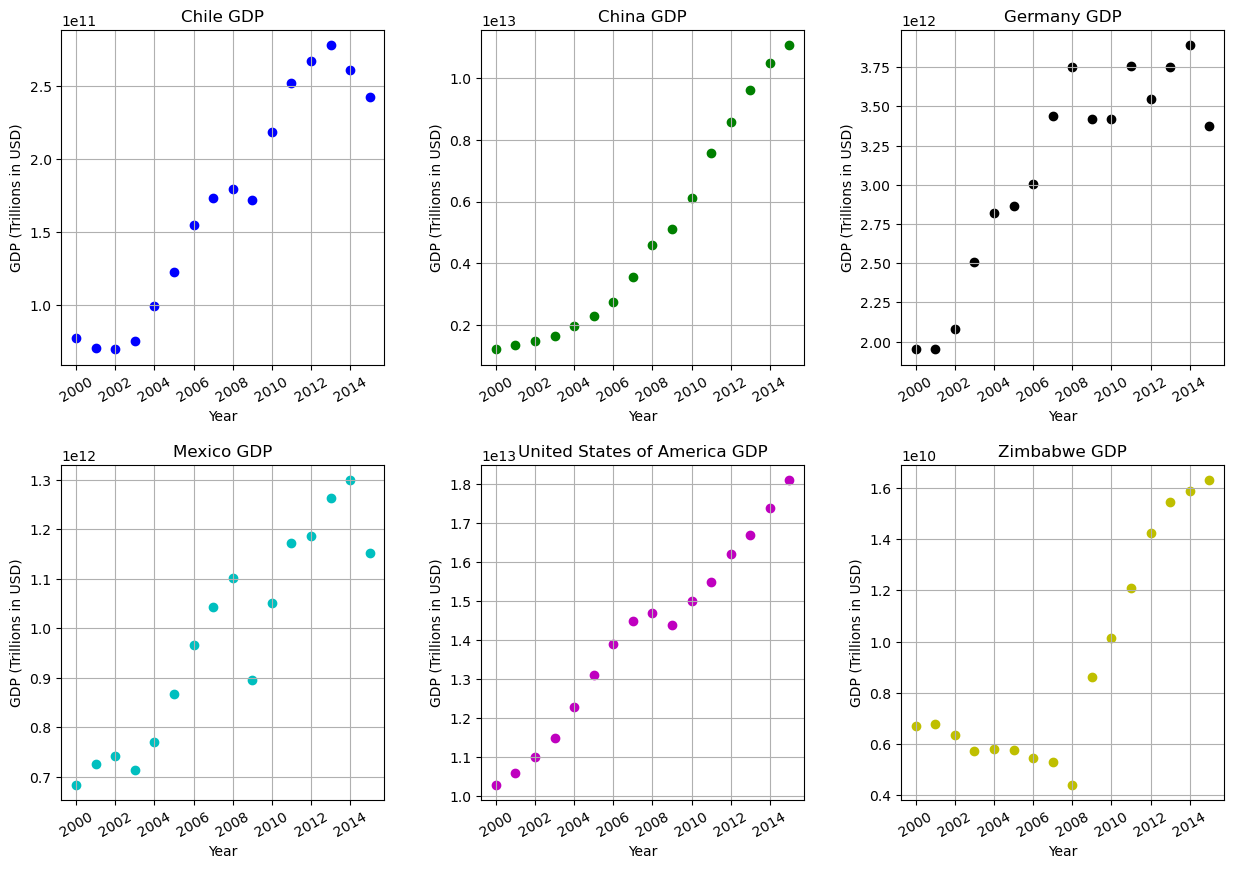

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a side-by-side subplots comparing all of the six countries of GDP against each other over the years.
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) #Create a subplots size of 2 rows to 3 columns subplots format. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 
axs = axs.ravel()
colors = ['b', 'g', 'black', 'c', 'm', 'y'] #Create a pallete of various colors for six of the countries.

for i, country in enumerate(countries):
    df = who_gdp_le_df[who_gdp_le_df['Country'] == country]
    axs[i].scatter(df['Year'], df['GDP'], color=colors[i])
    axs[i].set_xlabel('Year')
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True)) #Ensure that the numerics are set to discrete whole numbers for the year. 
    axs[i].set_ylabel('GDP (Trillions in USD)')
    axs[i].grid(True)
    axs[i].set_title(country + ' GDP')
    axs[i].tick_params(axis='x', labelrotation=30)
    plt.subplots_adjust(wspace=0.30) #Adjust the vertically spacing between subplots
    plt.subplots_adjust(hspace=0.30) #Adjust the horizontal spacing between subplots

plt.show()
plt.clf()

**Visual Summary:** Based on the six GDP scatter plots, the trends continued upwords from the lower left corner to the upper right corner of the scatter plots for the six countries. The GDP increase from the year **2000** to **2014**. 

3. Is there a correlation between the Gross Domestic Product (GDP) and the life expectancy of each country? If so, which countries have a higher positive or negative correlations with GDP?

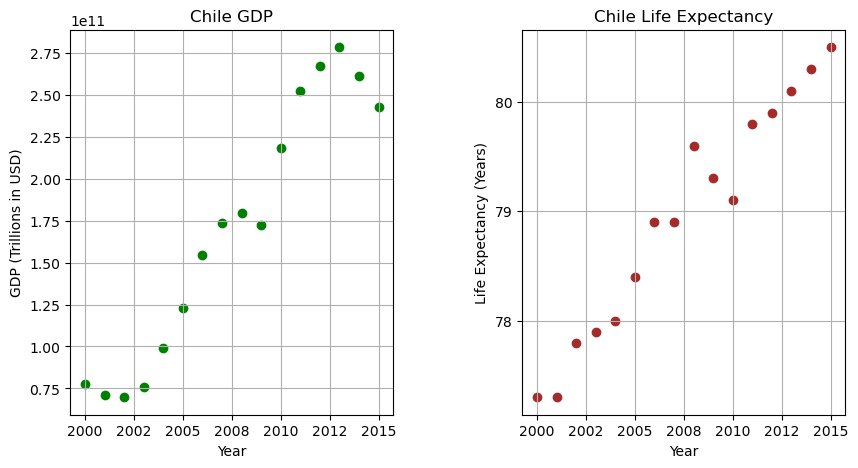

<Figure size 640x480 with 0 Axes>

In [16]:
# Create an individual graph for Chile that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Chile']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP (Trillions in USD)')
ax1.grid(True)
ax1.set_title('Chile GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('Chile Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** There is a high positive correlation between GDP to Life Expectancy for the country Chile. 

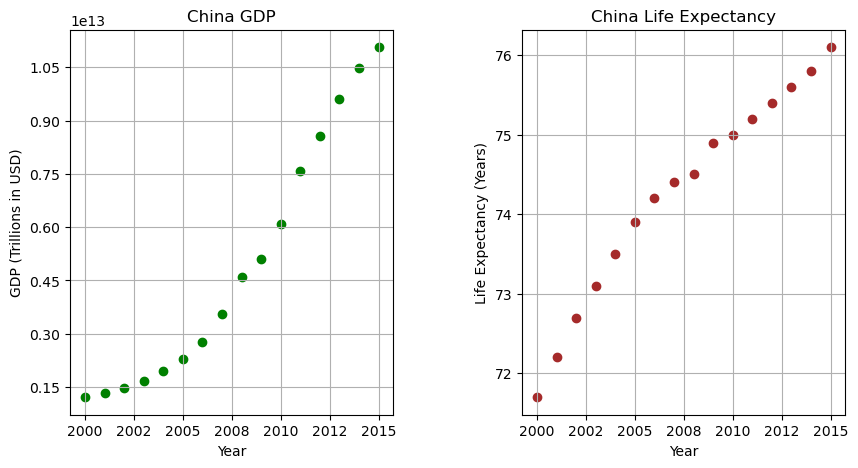

<Figure size 640x480 with 0 Axes>

In [17]:
# Create an individual graph for China that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'China']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP (Trillions in USD)')
ax1.grid(True)
ax1.set_title('China GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('China Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** China has a high positive correlation of GDP to life expectancy ratio. 

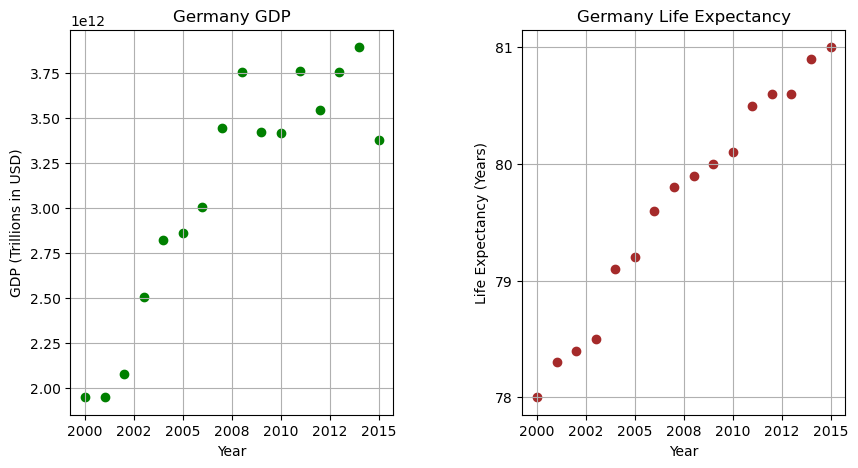

<Figure size 640x480 with 0 Axes>

In [18]:
# Create an individual graph for Germany that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Germany']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP (Trillions in USD)')
ax1.grid(True)
ax1.set_title('Germany GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('Germany Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** Germany has a high positive correlation of GDP to life expectancy ratio. 

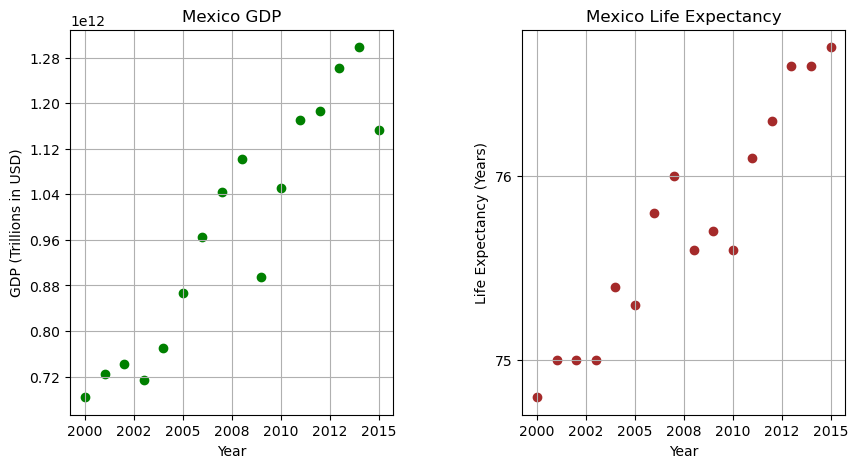

<Figure size 640x480 with 0 Axes>

In [19]:
# Create an individual graph for Mexico that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Mexico']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP (Trillions in USD)')
ax1.grid(True)
ax1.set_title('Mexico GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('Mexico Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** Mexico has a high positive correlation of GDP to life expectancy ratio. 

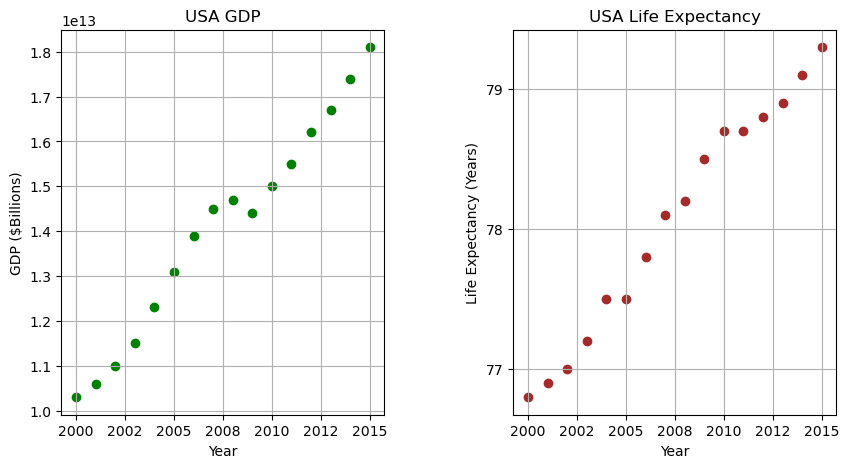

<Figure size 640x480 with 0 Axes>

In [20]:
# Create an individual graph for USA that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'United States of America']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP ($Billions)')
ax1.grid(True)
ax1.set_title('USA GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('USA Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** USA has a high positive correlation of GDP to life expectancy ratio. 

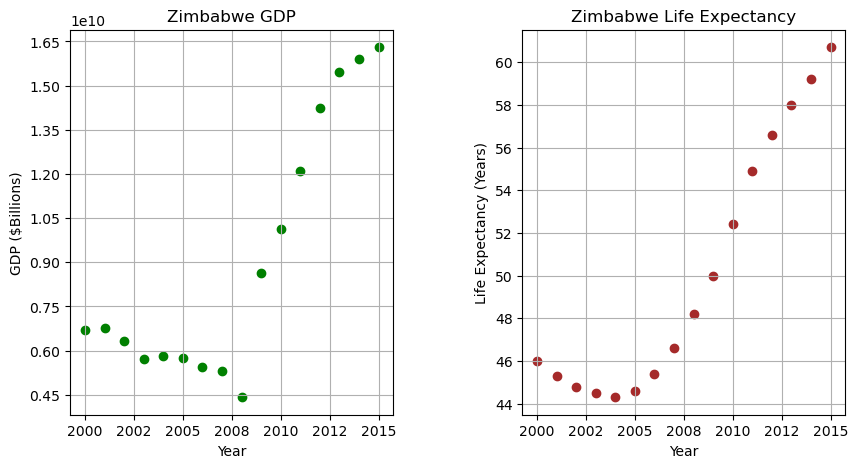

<Figure size 640x480 with 0 Axes>

In [21]:
# Create an individual graph for Zimbabwe that compares the GDP to life expectancy in the scatter plot. 
countries = who_gdp_le_df['Country'].unique() #Run through the original dataframe to find specific country and plot them on separate subplots. 

df = who_gdp_le_df[who_gdp_le_df['Country'] == 'Zimbabwe']

#Create a sie-by-side subplots to compare the country's GDP to Life Expectancy.  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(df['Year'], df['GDP'], color='Green')
ax1.set_xlabel('Year')
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.xaxis.set_major_formatter('{:.0f}'.format)
ax1.set_ylabel('GDP ($Billions)')
ax1.grid(True)
ax1.set_title('Zimbabwe GDP')

ax2.scatter(df['Year'], df['Life expectancy at birth (years)'], color='brown')
ax2.set_xlabel('Year')
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter('{:.0f}'.format)
ax2.set_ylabel('Life Expectancy (Years)')
ax2.grid(True)
ax2.set_title('Zimbabwe Life Expectancy')

plt.subplots_adjust(wspace=0.40)

plt.show()
plt.clf() #Clear the visuals for new plots. 

**Visual Summary:** I can see that there was a slight dip of both GDP and life expectancy for Zimbabwe due to unforseen circumstances and that there was an initial negative correlation because of that. After 2005, the correlation became positive as their GDP increased throughout the years. 

4. What is the average life expectancy for these nations?

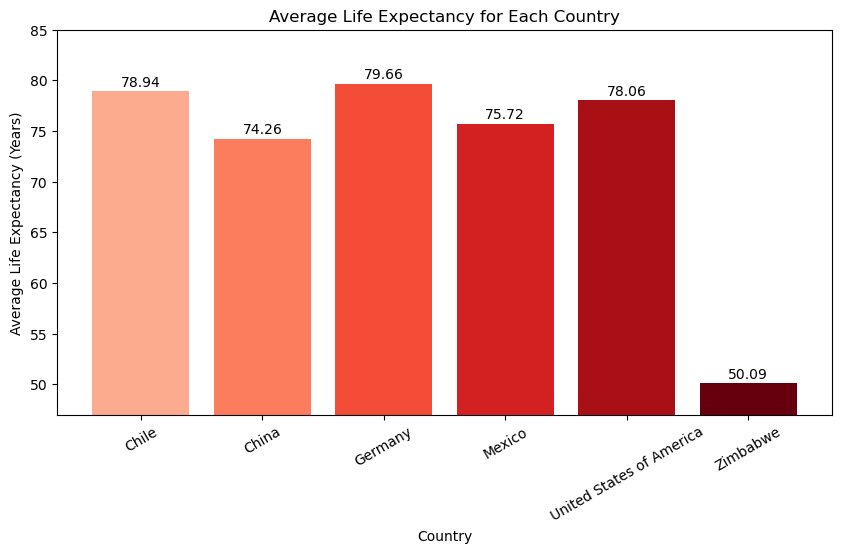

In [22]:
#Let's create a comparison chart using the bar chart to understand the average life expectancy average (mean) for each of the six nations. 
df = who_gdp_le_df.groupby(['Country'])['Life expectancy at birth (years)'].mean().reset_index() #Get unique country with life expectancy mean(avg). 

#Create a color map based on the life expectancy values. 
colors = plt.cm.Reds(np.linspace(0.3, 1, len(df)))

#Create the bar chart that compares the life expectancy average among the six nations. 
plt.figure(figsize=(10, 5)) #Set the size of the visual chart. 
plt.bar(df['Country'], df['Life expectancy at birth (years)'], color = colors)
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (Years)')
plt.ylim(47,85) #Adjusted to see the major differences of the average life expectancy for each country. 

# Add the average life expectancy above each bar
for i in range(len(df)):
    plt.text(df.index[i], df['Life expectancy at birth (years)'][i] + 0.5, round(df['Life expectancy at birth (years)'][i], 2), ha='center', fontsize=10)
    
plt.title('Average Life Expectancy for Each Country')

plt.show()

**Visual Summary:** Based on the review, Zimbabwe has the lowest life expectancy on average compared to the other 5 nations. The highest life average expectancy is 79.66 years in Germany. 

5. Show the distribution of the life expectancy for each country. 

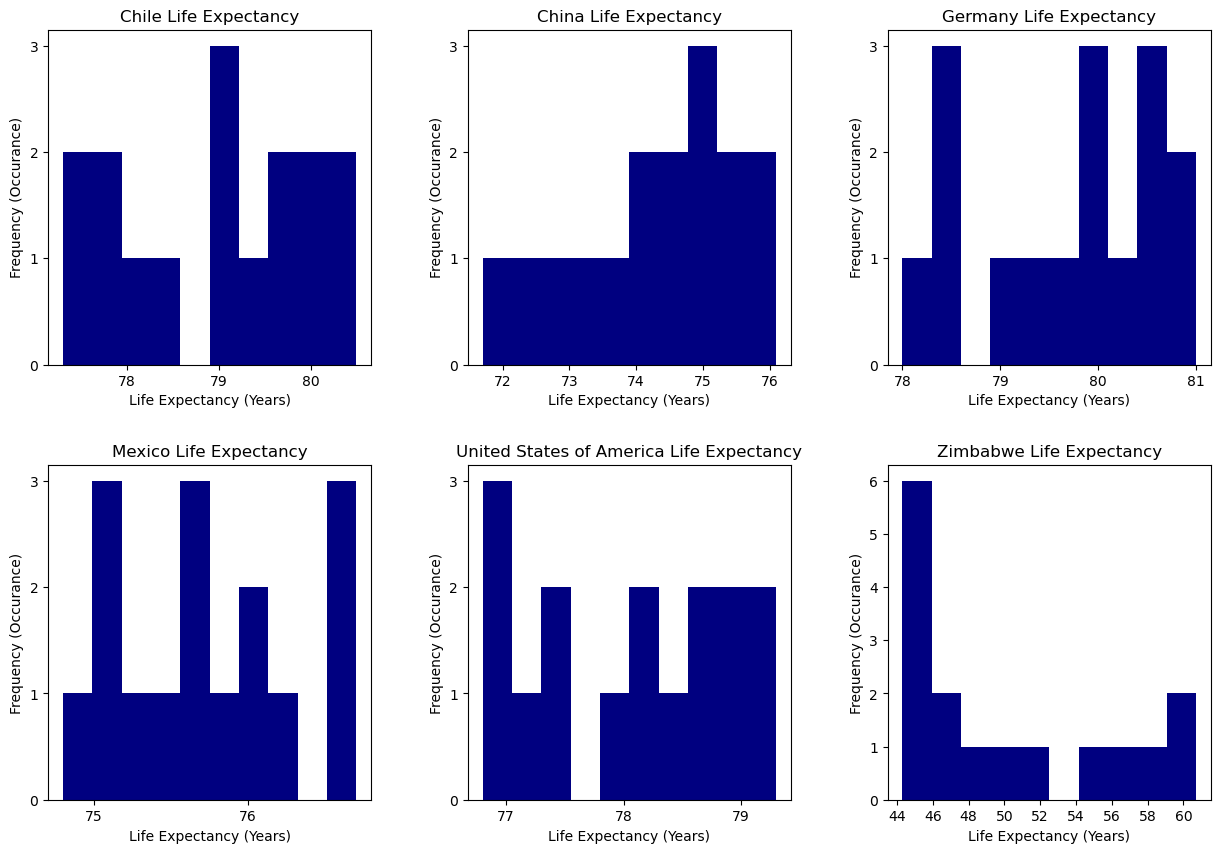

<Figure size 640x480 with 0 Axes>

In [23]:
#Create a distribution histogram of the life expectancy of all of the six nations by creating 6 subplots. 
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
countries = who_gdp_le_df['Country'].unique()
axs = axs.ravel()

#Create a for loop to plot 6 countries with the appropriate labels, data scales and title. 
for i, country in enumerate(countries):
    df = who_gdp_le_df[who_gdp_le_df['Country'] == country]
    axs[i].hist(df['Life expectancy at birth (years)'], color = 'navy')
    axs[i].set_xlabel('Life Expectancy (Years)')
    axs[i].set_ylabel('Frequency (Occurance)')
    axs[i].grid(False)
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    axs[i].set_title(country + ' Life Expectancy')
    plt.subplots_adjust(wspace=0.30)
    plt.subplots_adjust(hspace=0.30)

plt.show()
plt.clf()

**Visual Summary:** The above six subplots shows the frequency (occurences) of the numbers of common ages distributed in the histograms for the six nations. I can see that there were more frequency of ages 44 to 45 years of age life expectancy in Zimbabwe than any of the listed nations. On the other hand, in more developed nations the life expectancy increased along with the GDP. 

## Summary ##

This notebook portfolio reviews the countries' GDP and life expectancy dataset to understand important aspects of how GDP and life expectancy relates to each other. This is a great portfolio project in working with the real-world data from the WHO. 

If you are interested in this notebook, feel free to copy and explore further. 